[![Binder](https://mybinder.org/badge_logo.svg)](https://notebooks.gesis.org/binder/v2/gh/joshmaglione/CS102-Jupyter/main?labpath=.%2F05_AdvancedNumPy.ipynb) 

<a href="https://colab.research.google.com/github/joshmaglione/CS102-Jupyter/blob/main/05_AdvancedNumPy.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

[View on GitHub](https://github.com/joshmaglione/CS102-Jupyter/blob/main/05_AdvancedNumPy.ipynb)

# 05 : Advanced NumPy

## Learning outcomes

- Apply NumPy tools to explore and summarize a real dataset.
- Use vectorized computations and boolean masks for data cleaning and filtering.
- Connect NumPy computations to simple plots and tables for interpretation.

This is the last week where we will primarily be focused on NumPy. 

Of course, we will use NumPy throughout.

## Exmaple: Rainfall in Galway

We will use the data `data/Galway_rainfall.csv` which is also publicly available at 

[data.gov.ie](https://data.gov.ie/dataset/galway-univcoll-climate-data)

We will foreshadow a bit of what we will learn about in the coming weeks with this example.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We'll use `Pandas` to extract the relevant data. 

We want the daily rainfall from the years 2009, 2010, and 2011.

You don't have to worry about *what* is happening. 

In [2]:
pre_df = pd.read_csv("data/Galway_rainfall.csv", comment='#')
df = pd.DataFrame({
	'date': pd.to_datetime(pre_df['date'], format="%d-%b-%Y"),
	'rain': pre_df['rain']
})
df09 = df.query('20090101 <= date < 20100101')
df10 = df.query('20100101 <= date < 20110101')
df11 = df.query('20110101 <= date < 20120101')

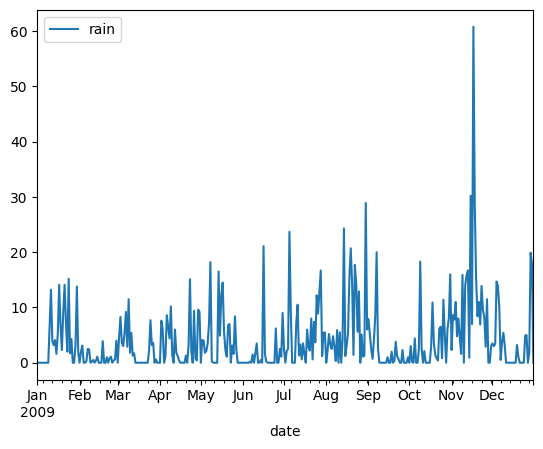

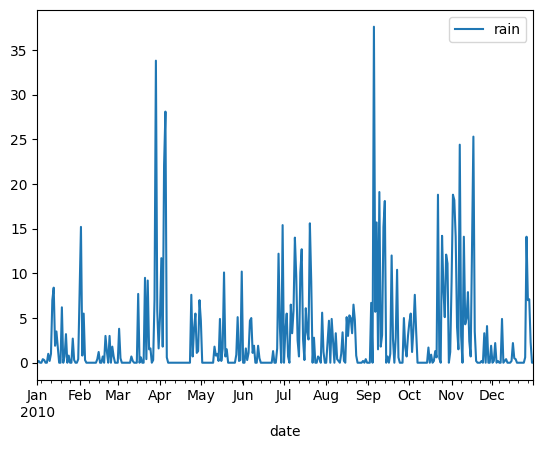

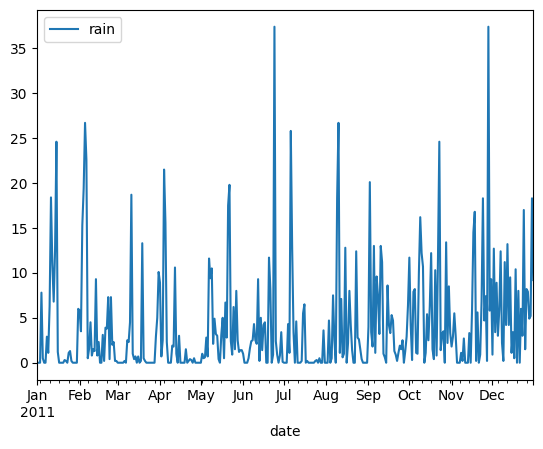

In [3]:
ax09 = df09.plot(x="date", y="rain")
ax10 = df10.plot(x="date", y="rain")
ax11 = df11.plot(x="date", y="rain")

They all kind of look the same. 

It's not entirely simple to answer the following questions by looking at the graphs. 
1. How many rainy days were there in the year? 
2. How many days with less than 3 mm of rain? 
3. What was the average amount on days with at least 3 mm of rain? 

Naturally there are countless other questions like this too.

In the above code, we have taken advantage of three key conveniences offered by NumPy. 
- (Basic) comparison
- [Masking](https://numpy.org/doc/stable/reference/maskedarray.generic.html#what-is-a-masked-array)
- [Advanced Indexing](https://numpy.org/doc/stable/user/basics.indexing.html#advanced-indexing)

## Comparisons

Boolean comparisons are also implemented using Ufuncs.

In [5]:
a1 = np.random.randint(10, size=5)
print(a1)

[7 3 1 7 6]


All of the standard boolean comparisons are available to us.

In [5]:
print(a1 > 4)

[False False  True False False]


In [6]:
print(a1 != 5)

[ True  True  True  True  True]


In [7]:
print(a1 == 3)

[False False False False False]


We know that *really* the RHS is being **broadcasted**. 

If you don't know what I mean, check out [Week04.ipynb](https://github.com/joshmaglione/CS102-Jupyter/blob/main/Week04.ipynb).

Thus, we can actually compare any pair of compatible arrays (under broadcasting rules).

In [8]:
print(2**a1 <= a1**2 - 2*a1 + 6)

[ True False False  True  True]


This next example trips me up every so often...

In [12]:
a1 = np.random.randint(10, size=5)
b1 = np.random.randint(10, size=5)
print(f"      a1 = {a1}")
print(f"      b1 = {b1}")
print(f"a1 == b1 = {a1 == b1}")

      a1 = [7 9 2 6 3]
      b1 = [7 7 8 0 8]
a1 == b1 = [ True False False False False]


Recall that it `False` is often interpretted as $0$ and `True` is interpretted as $1$.

This isn't just a convenience; there is good mathematical reason for this. (Logical operations have an algebraic analog.)

We can take advantage of this interpretation and we can count the number of `True` values with NumPy's `sum`.

In [6]:
print(a1)
count = np.sum(a1 > 3)
print(f"The number of entries greater than 3 is {count}")

[7 3 1 7 6]
The number of entries greater than 3 is 3


In [7]:
a2 = np.random.randint(10, size=(4,5))
print(a2)
col = np.sum(a2 % 2 == 0, axis=0)
row = np.sum(a2 % 2 == 0, axis=1)
print(f"The number of even entries in each column is {col}")
print(f"The number of even entries in each row is {row}")

[[7 7 1 8 2]
 [8 7 0 1 8]
 [1 4 3 7 8]
 [9 6 6 8 9]]
The number of even entries in each column is [1 2 2 2 3]
The number of even entries in each row is [2 3 2 3]


You can check if *any* or *all* values are `True`.

In [11]:
a2 = np.random.randint(10, size=(3, 5))
print(a2)
print(f"There exists a 4 in a2: {np.any(a2 == 4)}")
print(f"Every value in a2 is greater than 0: {np.all(a2 > 0)}")

[[6 9 5 6 8]
 [3 5 9 4 2]
 [4 2 1 0 2]]
There exists a 4 in a2: True
Every value in a2 is greater than 0: False


You can pass axis values with `any` and `all`.

In [12]:
print(np.any(a2 == 0, axis=0))

[False False False  True False]


![](imgs/clippy.png)

It looks like you are using functions already defined in Python: `any`, `all`, ans `sum`.


### Bitwise operators

You can also use the operators 
- `&` for `and`
- `|` for `or`
- `^` for `xor`
- `~` for `not`

I avoided using an `&` for the 2009 data:

In [13]:
df09 = df.query('20090101 <= date < 20100101')

x = 5
(2 < x < 7) == ((2 < x) & (x < 7))

True

## Masking

A *masked array* is a pair of arrays of identical shape and size. 

Depending on the masking, it might be more efficient to encode this with less data.

But for thinking about this, it is easier to think of a pair of arrays.

The *mask* is an array of boolean values. 

A `True` in the mask means that the corresponding value in the array is masked, or omitted. 

We can access masked arrays in NumPy via `ma.array`.

In [14]:
np.ma.array([1,2,3], mask=[0,1,0])

masked_array(data=[1, --, 3],
             mask=[False,  True, False],
       fill_value=999999)

But really, we can use the idea of masking as a means of selecting data.

In [17]:
a1 = np.random.randint(10, size=5)
print(a1)
print(a1 > 5)
print(a1[a1 > 5])

[7 0 1 1 1]
[ True False False False False]
[7]


The `a1 > 5` plays the role of the **negated** mask. That is, the mask is actually `~(a1 > 5)`.

I used masking to extract the desired data from our data set.

In [19]:
df09 = df.query('20090101 <= date < 20100101')
df09.head()

,date,rain
15767,2009-01-01,0.0
15768,2009-01-02,0.0
15769,2009-01-03,0.0
15770,2009-01-04,0.0
15771,2009-01-05,0.0


We can answer some of the questions we posed earlier. 

In [20]:
rf09 = df09["rain"]     # Just extract the rain data, ignore the dates.

In [21]:
rainy09 = np.sum(rf09 > 0)
print(f"In 2009, there were {rainy09} days with rain.")

In 2009, there were 241 days with rain.


In [22]:
avg09 = np.average(rf09[rf09 > 0])
print(f"In 2009, rainy days averaged {avg09} mm of rain.")

In 2009, rainy days averaged 6.288796680497925 mm of rain.


## Advanced Indexing

Some times one wants more than one particular entry. For example, a collection of individual entries but in an array.

In [23]:
a = np.random.randint(10, size=10)
print(a)

[2 3 9 9 5 1 3 4 4 3]


We might extract entries $0$, $2$, and $7$.

In [24]:
b = np.array([a[0], a[2], a[7]])
print(b)

[2 9 4]


But this isn't the best way to get that array. Instead, use more advanced indexing.

In [25]:
b = a[[0, 2, 7]]
print(b)

[2 9 4]


The `[0, 2, 7]` is the index array.

If the index array is a multi-dimensional array, then so is the output.

In [26]:
print(a)
ind = np.array([
    [0, 3],
    [2, 4]
])
print(ind)
print(a[ind])

[2 3 9 9 5 1 3 4 4 3]
[[0 3]
 [2 4]]
[[2 9]
 [9 5]]


You can even do this *on* multi-dimensional arrays.

In [27]:
a = np.random.randint(10, size=(4, 5))
print(a)

[[1 3 0 4 0]
 [5 0 9 6 9]
 [2 8 8 5 4]
 [3 4 5 5 4]]


We will index the entries $(0,0)$, $(1,0)$, $(0,1)$, and $(3,3)$ into a $1$-dimensional array.

In [28]:
print(a[[0,1,0,3], [0,0,1,3]])

[1 5 3 5]


We can put it into a $2\times 2$ array.

In [29]:
ind0 = np.array([
    [0, 0], [1, 3]
])
ind1 = np.array([
    [0, 1], [0, 3]
])
print(a[ind0, ind1])

[[1 3]
 [5 5]]


We can broadcast within the index array.

In [30]:
print(a)
print(a[ind0, 0])

[[1 3 0 4 0]
 [5 0 9 6 9]
 [2 8 8 5 4]
 [3 4 5 5 4]]
[[1 1]
 [5 3]]


#### What's happening here? 

In [31]:
print(a[ind0, 0:1])

[[[1]
  [1]]

 [[5]
  [3]]]


#### What is going on?!

Recall our array:

In [32]:
print(a)

[[1 3 0 4 0]
 [5 0 9 6 9]
 [2 8 8 5 4]
 [3 4 5 5 4]]


What is happening and why?

In [33]:
print(a[ind0, ind1])

[[1 3]
 [5 5]]


What about here?

In [34]:
print(a[ind0, np.newaxis])

[[[[1 3 0 4 0]]

  [[1 3 0 4 0]]]


 [[[5 0 9 6 9]]

  [[3 4 5 5 4]]]]


Just like with basic indexing you can modify values, you can modify values using advanced indexing as well. 

Try an example yourself.

## Sorting arrays

Yes Python has a `sort` and `sorted`, but numpy has similar.

In [35]:
a = np.random.randint(10, size=5)
print(a)
print(np.sort(a))

[0 6 7 5 6]
[0 5 6 6 7]


The method `sort` has no output. It only changes the state.

In [36]:
a = np.random.randint(10, size=5)
print(a)
print(a.sort())
print(a)

[6 8 5 6 3]
None
[3 5 6 6 8]


What is really neat is the `argsort` command.

See if you can understand what is happening in the following code.

In [37]:
a = np.random.randint(10, size=5)
print(a)
x = np.argsort(a)
print(x)
print(a[x])

[5 2 3 5 6]
[1 2 0 3 4]
[2 3 5 5 6]


`argsort` is not sorting the array, but rather giving you the *indices* that would sort the array.

There are other `argX`. For example we can use `argmax` to find the day with the most rainfall.

In [38]:
i = np.argmax(df09["rain"])
print(f"The {i}th day of 2009 had the most rainfall in Galway.")

The 320th day of 2009 had the most rainfall in Galway.


In [39]:
print(
    f"On {df09.iloc[i]["date"].strftime("%d %B")} it rained {df09.iloc[i]["rain"]} mm."
)

On 17 November it rained 60.8 mm.


(You can ignore all of the `pandas` yoga for now.)

## Exercises

I'll make the `pandas` objects into NumPy objects:

In [ ]:
a_10 = df10.to_numpy()
a_11 = df11.to_numpy()

1. Play around with some arrays. Try masking and advanced indexing. See if you can predict the output.
2. Find out some interesting data about rainfall in 2010 and 2011. Here are some examples:
   - What was the maximum amount in a day? 
   - What was the median amount in the year? 
   - How many days of rain? 
   - What was the average rainfall *on days that had some rain*?